# MACHINE LEARNING POUR LA SEGMENTATION DE LA CLIENTELE AVEC PYCARET ET STREAMLIT

# 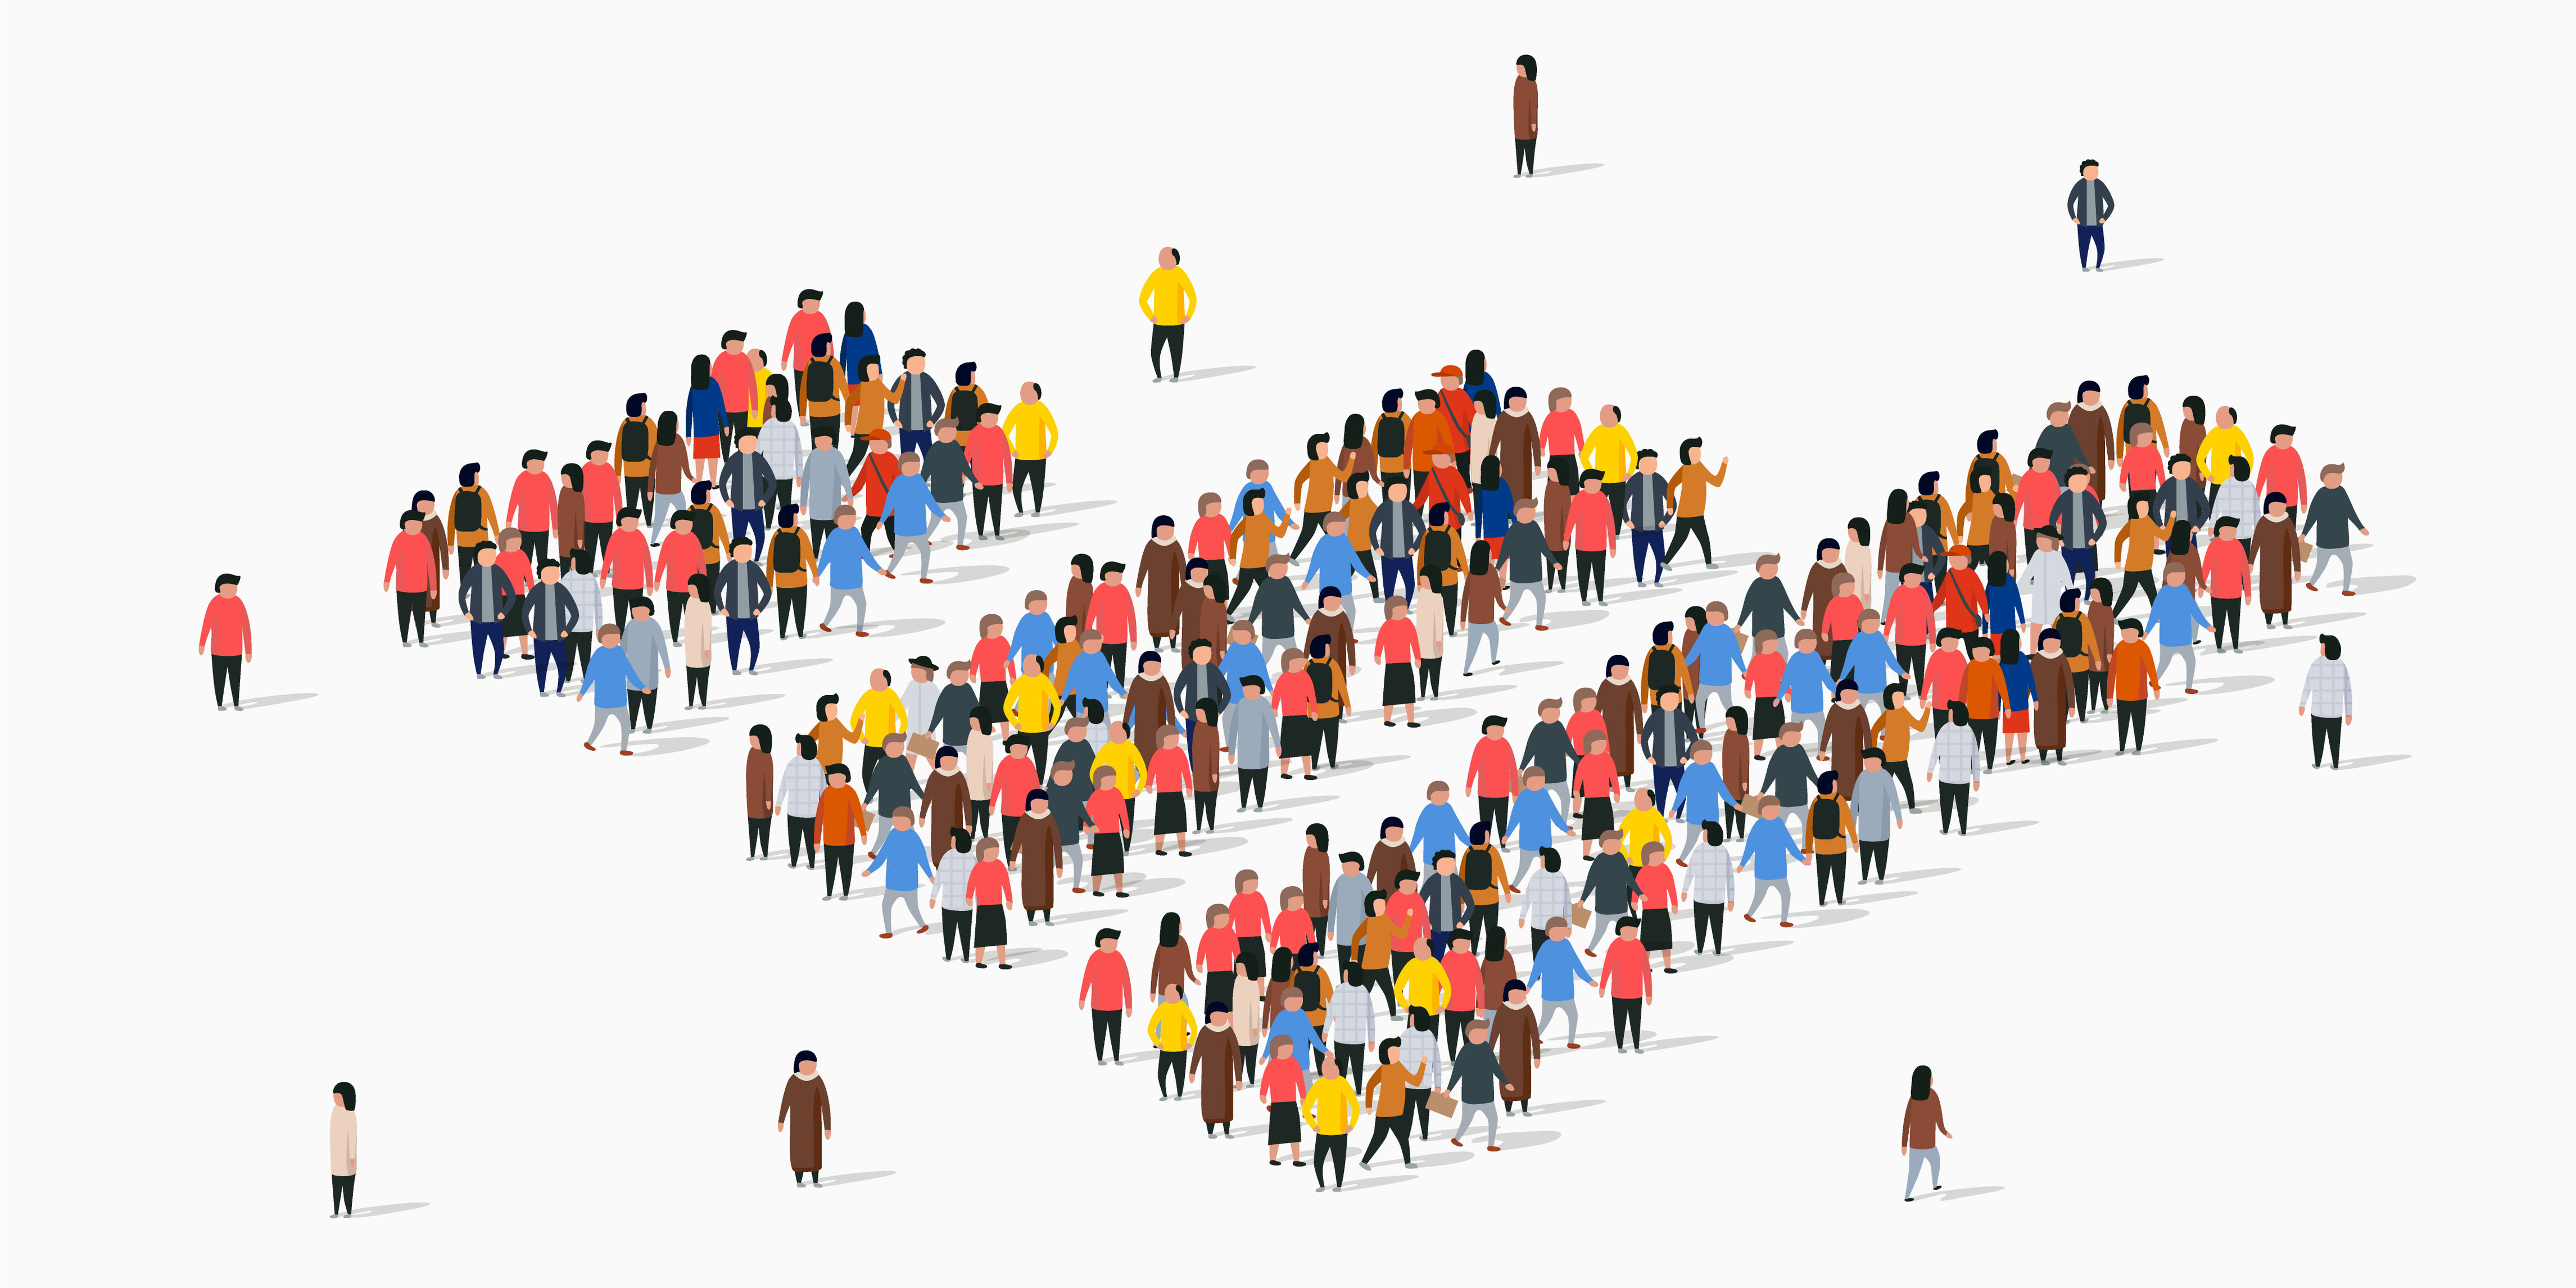


## Qu'est ce que la Segmentation de clients ?




La segmentation de la clientèle est un moyen d’organiser vos prospects, contacts et clients par caractéristiques communes pour leur fournir des informations ciblées, une expérience personnalisée et des produits qui leur parlent.


## Compréhension de la problematique business


Un constructeur automobile prévoit de pénétrer de nouveaux marchés avec ses produits existants (P1, P2, P3, P4 et P5). Après une étude de marché intensive, ils en ont déduit que le comportement du nouveau marché est similaire à celui de leur marché existant.
</b>

Sur leur marché existant, l’équipe commerciale a classé tous les clients en 4 segments (A, B, C, D). Ensuite, ils ont effectué une sensibilisation et une communication segmentées pour différents segments de clients. Cette stratégie a exceptionnellement bien fonctionné pour eux. Ils prévoient d’utiliser la même stratégie sur de nouveaux marchés et ont identifié 2627 nouveaux clients potentiels.

Vous devez aider le gestionnaire à prédire le bon groupe de nouveaux clients.

## Contenu

L'ensemble de données contient le profil des clients ayant des colonnes comme : </b>

* ID	(Unique ID)

* Genre	(Sexe du client)

* Ever_Married	(État civil du client)

* Âge	(Âge du client)
* Gradué	(Le client est-il diplômé ?)
* Profession	(Profession du client)
* Work_Experience	(Expérience professionnelle en années)
* Spending_Score	(Score de dépense du client)
* Family_Size	Nombre de membres de la famille pour le client (y compris le client)
* Var_1	(Catégorie anonymisée pour le client)
* Segmentation	**cible** Segment de clientèle du client

et sur la base de la même chose, nous essayons de predire le bon groupe de clients afin que l'équipe marketing puisse cibler l'acheteur potentiel de notre produit.
</b>

Par conséquent, nous utiliserons des techniques de clustering avec le module PyCaret pour segmenter les clients.
</b>

Le clustering est un algorithme d'apprentissage non supervisé qui tente de regrouper les données en fonction de leur similitude dans le comportement.

In [1]:
# Installation de Pycaret
#%pip install pycaret

In [2]:
# Installation de pandas
import pandas as pd

In [3]:
## Obtenir les données
jewel_data = pd.read_csv(r"C:\Users\CEDRIC ANDERSON\Downloads\ProjetPro vsCode\Clustoring-Pycaret\Data\Data-Train.csv")

#vérifier la forme des données
print("La taille du DataSet est : ", jewel_data.shape)
jewel_data.head()

La taille du DataSet est :  (8068, 11)


ID  Gender Ever_Married  Age Graduated     Profession  Work_Experience  \
0  462809    Male           No   22        No     Healthcare              1.0   
1  462643  Female          Yes   38       Yes       Engineer              NaN   
2  466315  Female          Yes   67       Yes       Engineer              1.0   
3  461735    Male          Yes   67       Yes         Lawyer              0.0   
4  462669  Female          Yes   40       Yes  Entertainment              NaN   

  Spending_Score  Family_Size  Var_1 Segmentation  
0            Low          4.0  Cat_4            D  
1        Average          3.0  Cat_4            A  
2            Low          1.0  Cat_6            B  
3           High          2.0  Cat_6            B  
4           High          6.0  Cat_6            A

Pour booster la productivité, nous utiliserons Le module de clustering de PyCaret. Ce module est un module d’apprentissage automatique non supervisé qui effectue la tâche de regrouper un ensemble d’objets de telle sorte que ceux du même groupe (appelé cluster) soient plus similaires les uns aux autres que ceux des autres groupes.</b>


Afin de démontrer l’utilisation de la fonction sur des données invisibles, un échantillon de 5% (403 enregistrements) a été retenu de l’ensemble de données original pour être utilisé pour les prédictions à la fin de l’expérience.

In [4]:
## Division du dataset
data = jewel_data.sample(frac=0.95, random_state=42).reset_index(drop=True)
data_unseen = jewel_data.drop(data.index).reset_index(drop=True)

print('Données pour modélisation: ' + str(data.shape))
print('echantillon pour prediction: ' + str(data_unseen.shape))

Données pour modélisation: (7665, 11)
echantillon pour prediction: (403, 11)


## Configuration de l'environnement dans PyCaret

La fonction de PyCaret **setupsetup** initialise l’environnement et crée le pipeline de transformation pour la modélisation et le déploiement. doit être appelé avant d’exécuter toute autre fonction dans Pycaret. Il ne faut qu’un seul paramètre obligatoire : une dataframe pandas. Tous les autres paramètres facultatifs peuvent être utilisés pour personnaliser le pipeline de prétraitement.

Lorsque setup() est exécuté, l'algorithme d'inférence de PyCaret déduit automatiquement les types de données pour toutes les fonctionnalités en fonction de certaines propriétés. Le type de données doit être déduit correctement, mais ce n'est pas toujours le cas. Pour tenir compte de cela, PyCaret affiche un tableau contenant les fonctionnalités et leurs types de données déduits après l'exécution de setup().

In [5]:
# Pretraitement
from pycaret.clustering import *
cust_exp = setup(data = data,
                 normalize = True, 
                 ignore_features = ['ID'],
                 session_id = 123)

## Modelisation

In [6]:
# Creation de modele
kmeans = create_model('kmeans')

Initiated  . . . . . . . . . . . . . . . . . .              09:00:12
Status     . . . . . . . . . . . . . . . . . .  Loading Dependencies
Estimator  . . . . . . . . . . . . . . . . . .     Compiling Library

## Affecter un modèle

Maintenant que nous avons formé un modèle, nous pouvons attribuer les étiquettes de cluster à notre jeu de données d’apprentissage (8068 exemples) à l’aide de la fonction assign_model.

In [7]:
kmean_results = assign_model(kmeans)
kmean_results.head()

Gender Ever_Married  Age Graduated     Profession  Work_Experience  \
0    Male           No   28       Yes  Entertainment              NaN   
1  Female          Yes   29       Yes  Entertainment              0.0   
2    Male           No   20       NaN     Healthcare              4.0   
3    Male          Yes   51       Yes  Entertainment              1.0   
4  Female           No   19        No  Entertainment              1.0   

  Spending_Score  Family_Size  Var_1 Segmentation    Cluster  
0            Low          3.0  Cat_4            D  Cluster 2  
1        Average          2.0  Cat_6            A  Cluster 1  
2            Low          5.0  Cat_2            D  Cluster 2  
3        Average          4.0  Cat_6            C  Cluster 1  
4            Low          5.0  Cat_6            D  Cluster 2

In [8]:
kmean_results[kmean_results['Cluster'] == 'Cluster 0']

Gender Ever_Married  Age Graduated Profession  Work_Experience  \
24      Male          Yes   67        No     Lawyer              NaN   
26      Male          Yes   50       Yes  Executive              4.0   
27      Male          Yes   67        No     Lawyer              NaN   
29      Male          Yes   62       Yes     Artist              1.0   
51      Male          Yes   60       Yes  Executive              0.0   
...      ...          ...  ...       ...        ...              ...   
7649    Male          Yes   51        No  Executive              NaN   
7656    Male          Yes   53       Yes  Executive              0.0   
7657    Male          Yes   48       Yes  Executive              2.0   
7660  Female          Yes   87       Yes     Artist              1.0   
7663  Female          Yes   81       Yes     Lawyer              NaN   

     Spending_Score  Family_Size  Var_1 Segmentation    Cluster  
24             High          2.0  Cat_6            A  Cluster 0  
26             High          3.0  Cat_6            C  Cluster 0  
27              Low          NaN  Cat_6            D  Cluster 0  
29             High          2.0  Cat_6            B  Cluster 0  
51             High          4.0  Cat_6            B  Cluster 0  
...             ...          ...    ...          ...        ...  
7649           High          4.0  Cat_6            C  Cluster 0  
7656            Low          2.0  Cat_2            C  Cluster 0  
7657           High          5.0  Cat_6            C  Cluster 0  
7660           High          2.0  Cat_2            C  Cluster 0  
7663           High          2.0  Cat_6            A  Cluster 0  

[1444 rows x 11 columns]

## Tracez de graphiques

In [9]:
## Diagramme de l'ACP
plot_model(kmeans, 'cluster')

Les étiquettes de cluster sont automatiquement colorées et affichées dans une légende.

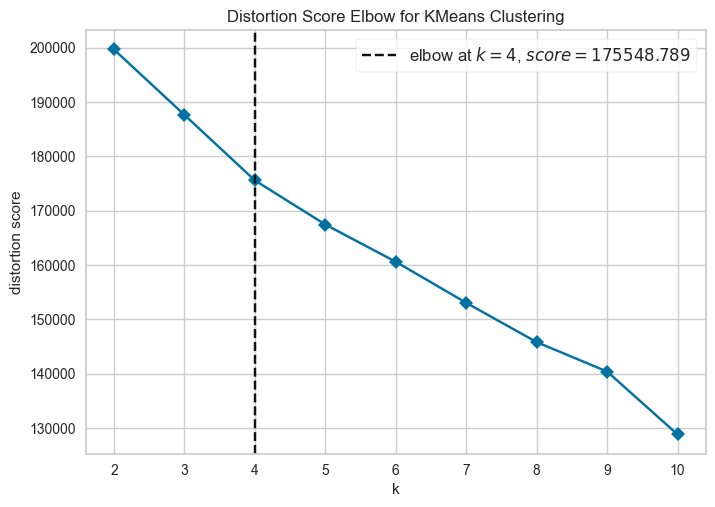

In [10]:
## Tracé du coude
plot_model(kmeans, plot = 'elbow')

La méthode du coude est une méthode heuristique d’interprétation et de validation de la cohérence au sein de l’analyse de cluster conçue pour aider à trouver le nombre approprié de clusters dans un jeu de données. Dans cet exemple, le diagramme du coude ci-dessus suggère que c’est le nombre optimal de grappes.4

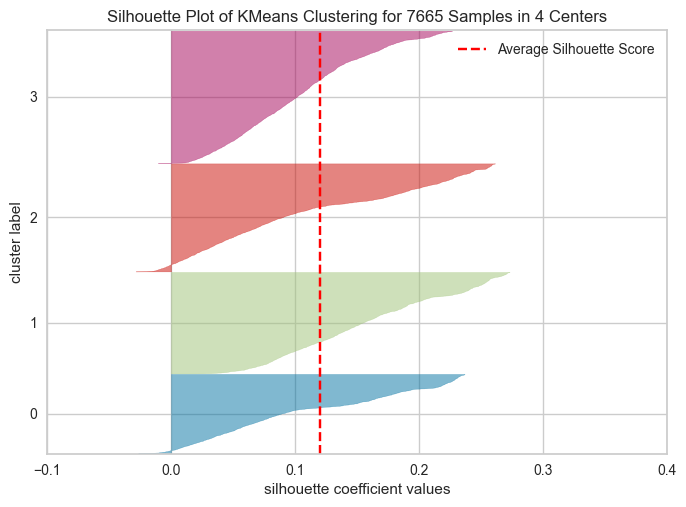

In [11]:
## Tracé de la silhouette
plot_model(kmeans, plot = 'silhouette')

La silhouette est une méthode d’interprétation et de validation de la cohérence au sein de grappes de données. La technique fournit une représentation graphique succincte de la façon dont chaque personnes a été classé. En d’autres termes, la valeur de la silhouette est une mesure de la similitude d’une personne avec son propre cluster (cohésion) par rapport à d’autres clusters (séparation).

In [12]:
## Parcelle de distribution
plot_model(kmeans, plot = 'distribution')

Le graphique de distribution montre la taille de chaque cluster. Lorsqu'on survole les barres, on verrez le nombre d’échantillons attribués à chaque groupe. D’après l’exemple ci-dessus, nous pouvons observer que le groupe 3 a le plus grand nombre d’échantillons. Nous pouvons également utiliser le graphique pour voir la distribution des étiquettes de cluster en association avec toute autre caractéristique numérique ou catégorielle. Voir un exemple ci-dessous :distribution

In [13]:
## Distribution des étiquettes de cluster
plot_model(kmeans, plot = 'distribution', feature = 'Gender')

## Prédire sur des données invisibles

La fonction est utilisée pour attribuer des étiquettes de cluster à un nouveau jeu de données invisible. Nous allons maintenant utiliser notre modèle pour prédire les données stockées. Cette variable a été créée au début du didacticiel et contient 5% échantillons du jeu de données d’origine qui n’ont jamais été exposés à PyCaret.

In [14]:
## Enregistrement de l'echantillon 5% sous fichier csv
unseen_predictions = predict_model(kmeans, data=data_unseen)
unseen_predictions.to_csv("test.csv",index=False)

In [15]:
## Prediction
unseen_predictions = predict_model(kmeans, data=data_unseen)
unseen_predictions.head()

Gender  Ever_Married       Age  Graduated  Profession_Entertainment  \
0  0.906383     -1.200127 -1.518913  -1.287543                 -0.365890   
1  0.906383      0.833245 -0.802079   0.776673                  2.733059   
2  0.906383      0.833245  1.647107  -1.287543                 -0.365890   
3  0.906383      0.833245  0.213437   0.776673                 -0.365890   
4  0.906383     -1.200127  0.093965   0.776673                 -0.365890   

   Profession_Healthcare  Profession_Artist  Profession_Doctor  \
0               2.252486          -0.695514          -0.305931   
1              -0.443954          -0.695514          -0.305931   
2              -0.443954          -0.695514          -0.305931   
3              -0.443954           1.437785          -0.305931   
4              -0.443954           1.437785          -0.305931   

   Profession_Homemaker  Profession_Engineer  ...  Var_1_Cat_2  Var_1_Cat_3  \
0             -0.177453            -0.307459  ...    -0.238336    -0.336105   
1             -0.177453            -0.307459  ...    -0.238336    -0.336105   
2             -0.177453            -0.307459  ...    -0.238336    -0.336105   
3             -0.177453            -0.307459  ...    -0.238336    -0.336105   
4             -0.177453            -0.307459  ...    -0.238336    -0.336105   

   Var_1_Cat_1  Var_1_Cat_5  Var_1_Cat_7  Segmentation_D  Segmentation_A  \
0    -0.130835    -0.102699    -0.160289        1.594895       -0.570270   
1    -0.130835    -0.102699    -0.160289       -0.627001       -0.570270   
2    -0.130835    -0.102699    -0.160289       -0.627001       -0.570270   
3    -0.130835    -0.102699    -0.160289       -0.627001       -0.570270   
4    -0.130835    -0.102699    -0.160289       -0.627001        1.753556   

   Segmentation_C  Segmentation_B    Cluster  
0       -0.566453       -0.545741  Cluster 2  
1        1.765373       -0.545741  Cluster 1  
2        1.765373       -0.545741  Cluster 0  
3        1.765373       -0.545741  Cluster 1  
4       -0.566453       -0.545741  Cluster 3  

[5 rows x 30 columns]

## Enregistrement du modèle

In [16]:
save_model(kmeans,'Final Kmeans Model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\CEDRIC~1\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Age', 'Work_Experience',
                                              'Family_Size'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['Gender', 'Ever_Married',
                                              'Graduated', 'Profession',
                                              'Spending_Score', 'Var_1',
                                              'Segmentation'],
                                     tra...
                 ('onehot_encoding',
                  TransformerWrapper(include=['Profession', 'Spending_Score',
                                              'Var_1', 'Segmentation'],
                                     transformer=OneHotEncoder(cols=['Profession',
                                        

## Chargement du model enregistré

In [17]:
## Chargé le modèle
saved_kmeans = load_model('Final Kmeans Model')

Transformation Pipeline and Model Successfully Loaded


In [18]:
## Nouvelle prediction
new_prediction = predict_model(saved_kmeans, data=data_unseen)
new_prediction.head()

Gender Ever_Married  Age Graduated     Profession  Work_Experience  \
0   Male           No   18        No     Healthcare              2.0   
1   Male          Yes   30       Yes  Entertainment              NaN   
2   Male          Yes   71        No      Executive              0.0   
3   Male          Yes   47       Yes         Artist              1.0   
4   Male           No   45       Yes         Artist              0.0   

  Spending_Score  Family_Size  Var_1 Segmentation    Cluster  
0            Low          3.0  Cat_6            D  Cluster 2  
1        Average          3.0  Cat_6            C  Cluster 1  
2           High          4.0  Cat_6            C  Cluster 0  
3        Average          4.0  Cat_6            C  Cluster 1  
4            Low          4.0  Cat_6            A  Cluster 3

# Passons maintenant a l'Application Web